# Exploratory Data Analysis for Automobile data frame

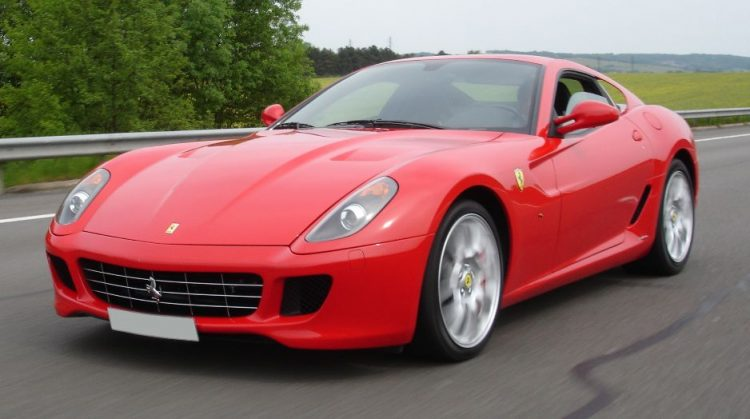

In [206]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import ast

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline



#### load the auto dataset and create their dataframes

In [207]:
automobile_df = pd.read_csv("automobile.txt")
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Find the types in the data frame

In [208]:
automobile_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Data Cleansing

### Look for null fields

In [209]:
automobile_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Find out number of records having '?' value 

In [210]:
automobile_df['normalized-losses'].loc[automobile_df['normalized-losses'] == '?'].count()

41

### Setting the missing value to mean of normalized losses and convert the datatype to integer

In [211]:
nl = automobile_df['normalized-losses'].loc[automobile_df['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile_df['normalized-losses'] = automobile_df['normalized-losses'].replace('?',nlmean).astype(int)
automobile_df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

### Check the fields with ? have been replaced

In [212]:
automobile_df['normalized-losses'].loc[automobile_df['normalized-losses'] == '?'].count()

0

### Clean num of doors column

### remove the records which are having the value '?'

In [213]:
automobile_df['num-of-doors'].loc[automobile_df['num-of-doors'] == '?']
automobile_df = automobile_df[automobile_df['num-of-doors'] != '?']
automobile_df['num-of-doors'].loc[automobile_df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

### Clean num of doors column

### Convert the non-numeric data to null and convert the datatype

In [216]:
automobile_df['peak-rpm'] = pd.to_numeric(automobile_df['peak-rpm'],errors='coerce')


### Clean stroke column

### Replace the non-number value to null and convert the datatype

In [217]:
automobile_df['stroke'] = pd.to_numeric(automobile_df['stroke'],errors='coerce')


### Clean bore column

### Find out the number of invalid value

In [218]:
automobile_df['bore'].loc[automobile_df['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

### Replace the non-numeric value to null and conver the datatype

In [219]:
automobile_df['bore'] = pd.to_numeric(automobile_df['bore'],errors='coerce')


### Clean price column

### Find out the number of values which are not numeric

In [220]:
automobile_df['price'].str.isnumeric().value_counts()

True     199
False      4
Name: price, dtype: int64

### List out the values which are not numeric

In [221]:
automobile_df['price'].loc[automobile_df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

### Setting the missing value to mean of price and convert the datatype to integer

In [222]:
price = automobile_df['price'].loc[automobile_df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile_df['price'] = automobile_df['price'].replace('?',pmean).astype(int)
automobile_df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

### Clean horsepower column

### Replace the non-numeric value to null and conver the datatype

In [223]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'],errors='coerce')

In [224]:
automobile_df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

# Analyse the data

### Number of doors count plot

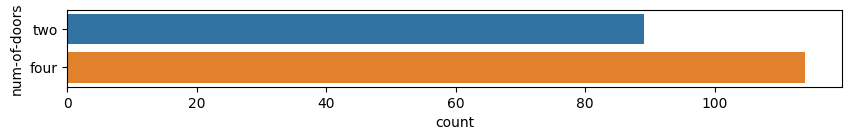

In [225]:
fig = plt.figure(figsize=(10,1))
sns.countplot(y='num-of-doors', data=automobile_df);


Analysis shows that four door cars account for around 60% and two door cars 40% in this data frame

### Normalized losses based on body style and no. of doors pivot table

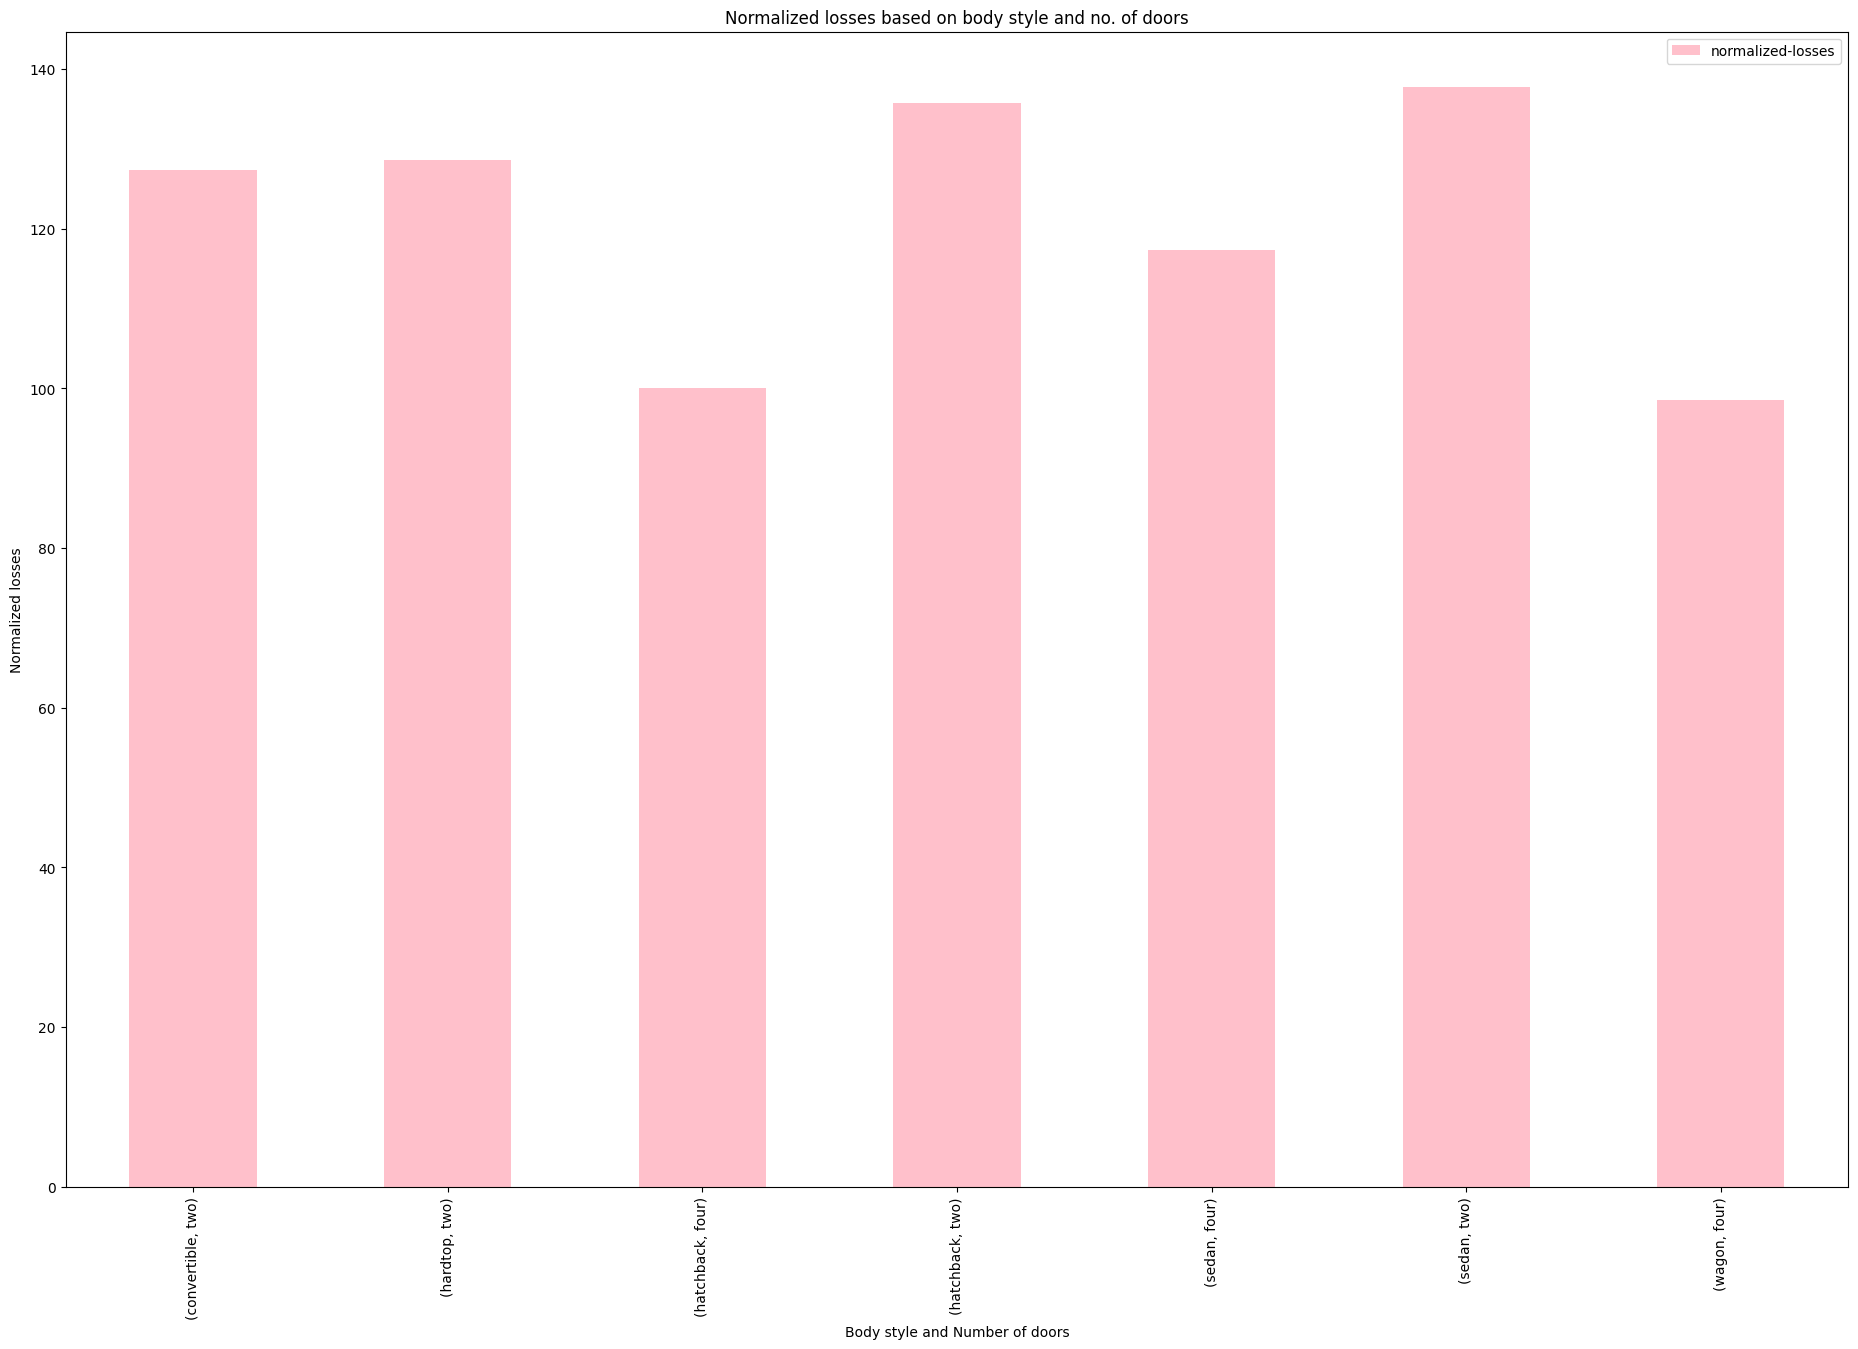

In [226]:
pd.pivot_table(automobile_df,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='pink')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and Number of doors');

Analysis shows that normalized losses are distributed across different body style but the two door cars has more number of losses than the four door cars in this data frame.

Lets look at our vehicle body styles in a pie chart

C:\Users\cheek\AppData\Local\Temp\ipykernel_22008\1550578276.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


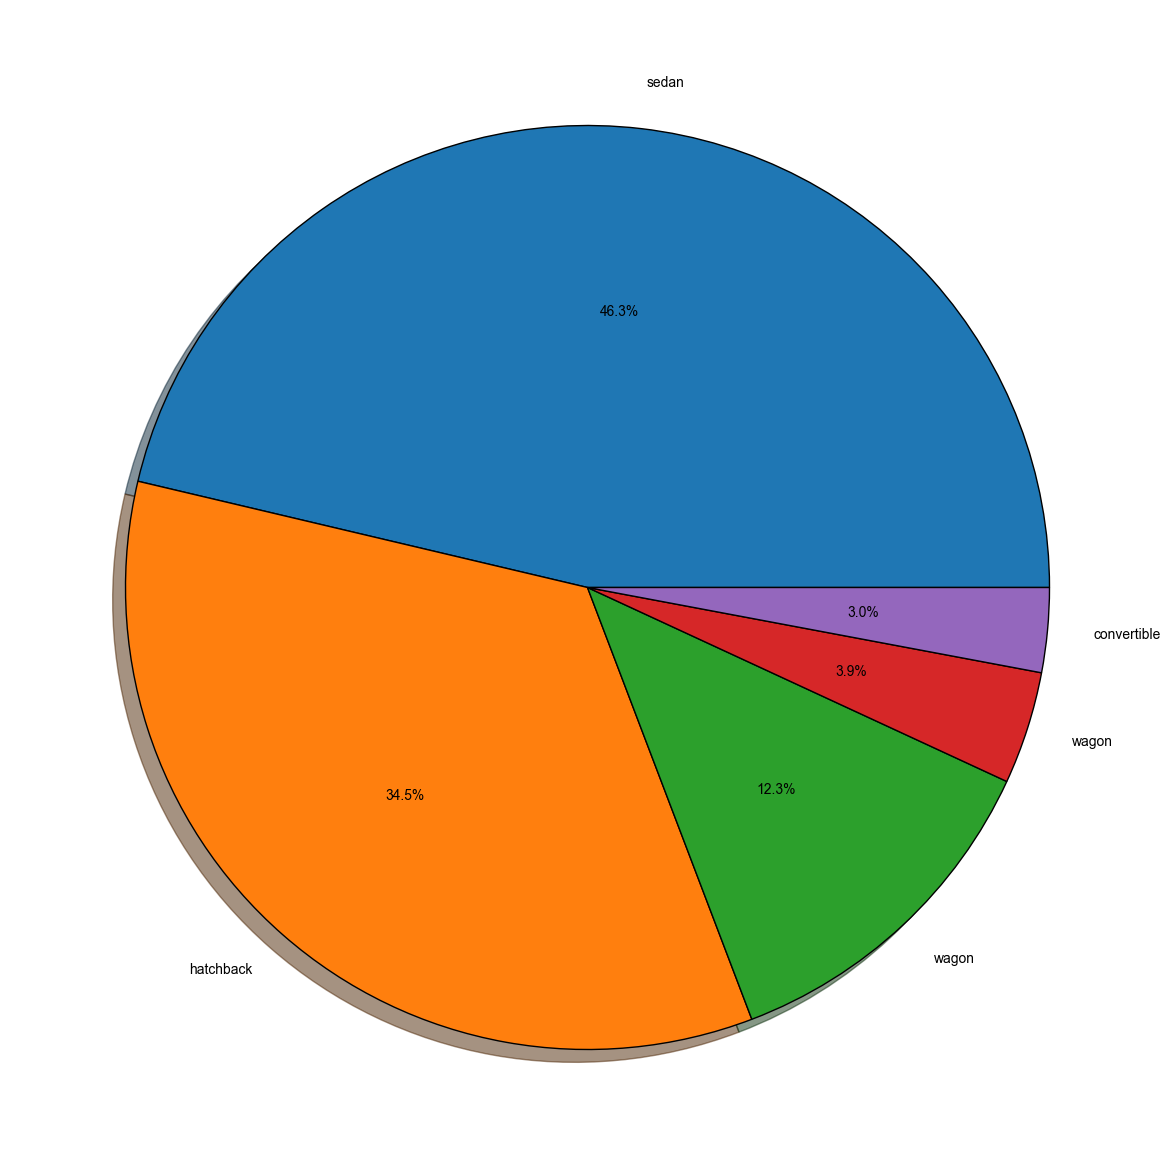

In [246]:
kinnd = [automobile_df['body-style'].value_counts()[0],automobile_df['body-style'].value_counts()[1],
         automobile_df['body-style'].value_counts()[2],automobile_df['body-style'].value_counts()[3],automobile_df['body-style'].value_counts()[4]]
laabbell = ['sedan' ,'hatchback', 'wagon','wagon','convertible']

plt.pie(kinnd , labels = laabbell , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
plt.style.use('seaborn')
plt.show()


The above analysis shows sedan and hatchback are the most vehicle body style in this data frame

### Wheel Transmission bar chart

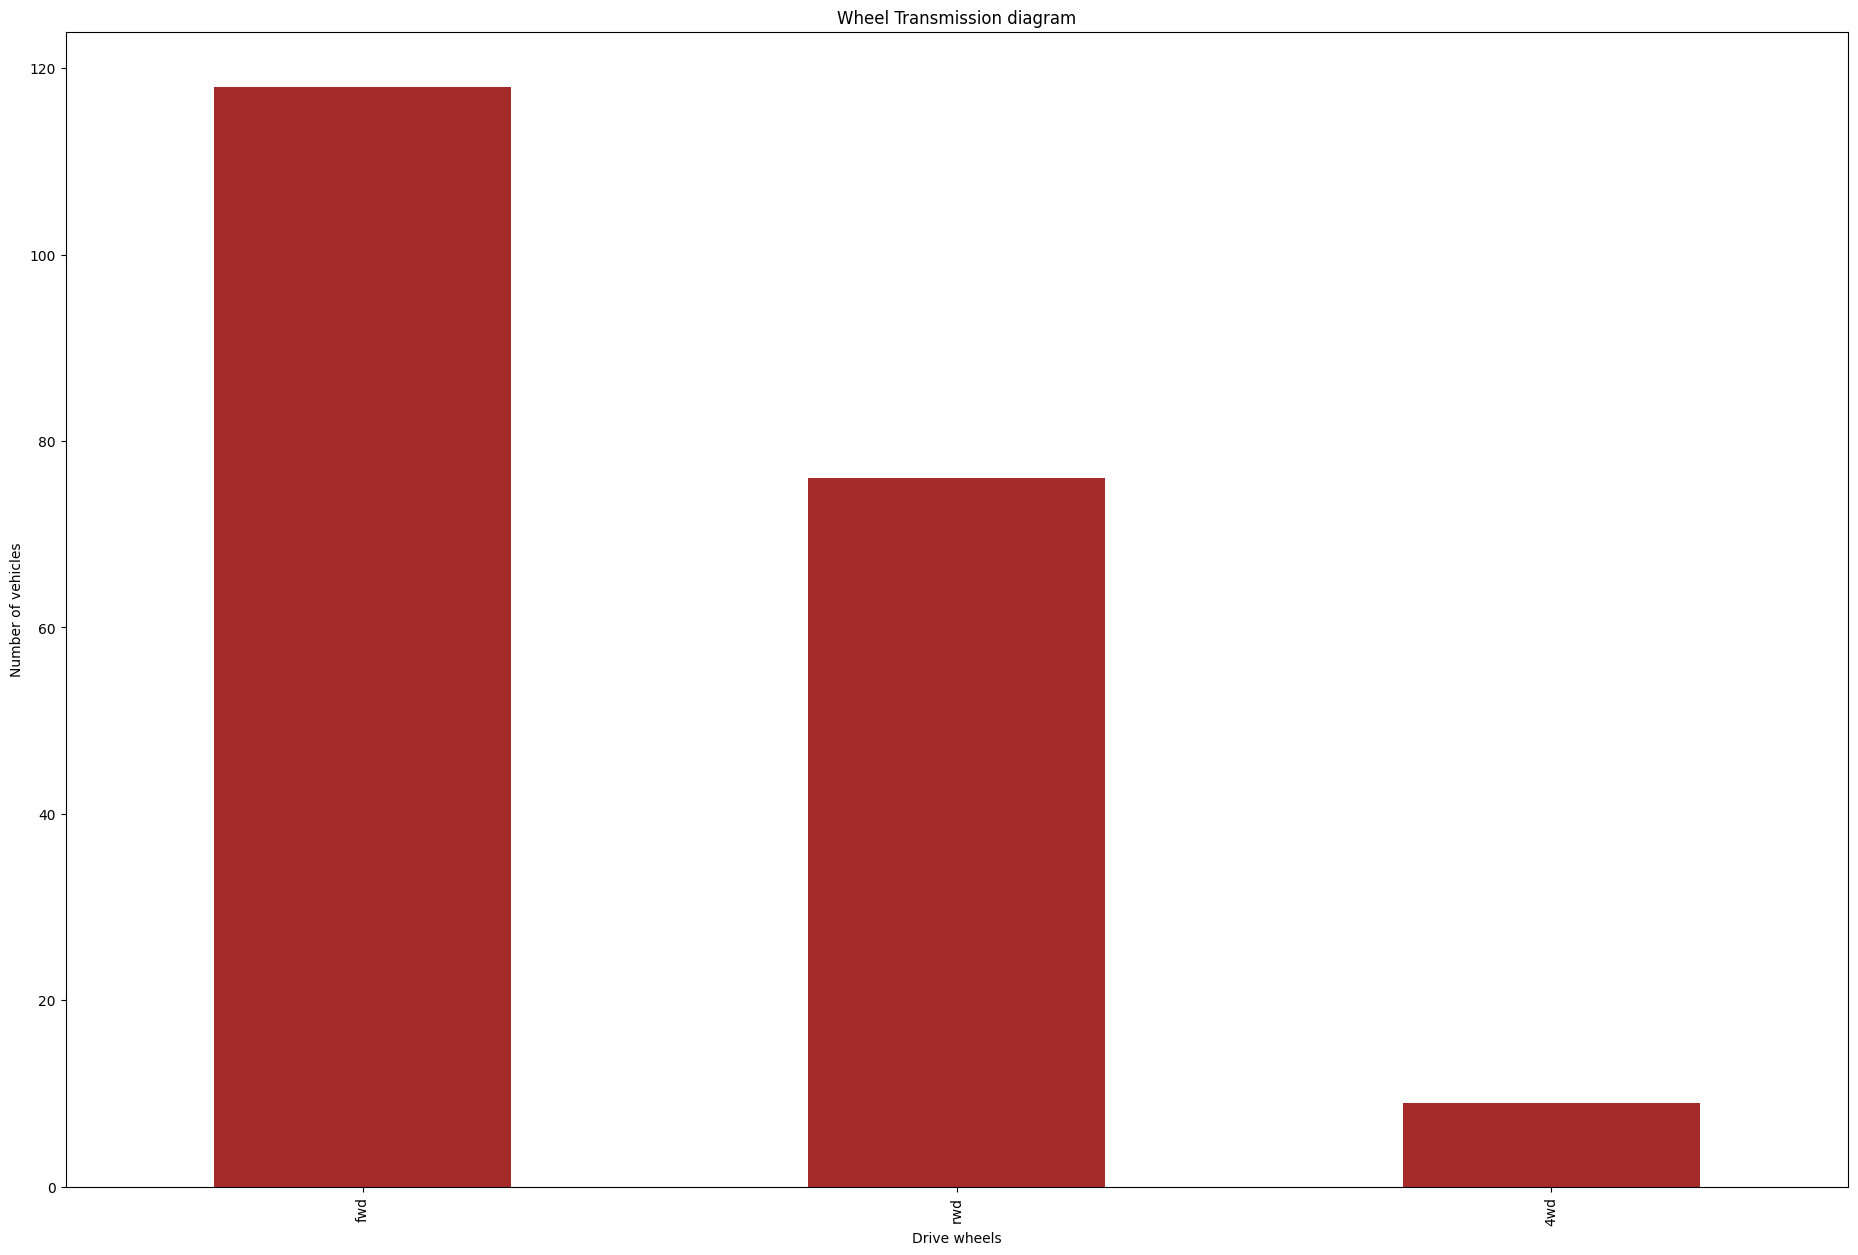

In [227]:
automobile_df['drive-wheels'].value_counts().plot(kind='bar',color='brown')
plt.title("Wheel Transmission diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

Analysis shows front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less few number of cars driven that are four wheel drive in this data frame

Drive wheels and City MPG bar chart

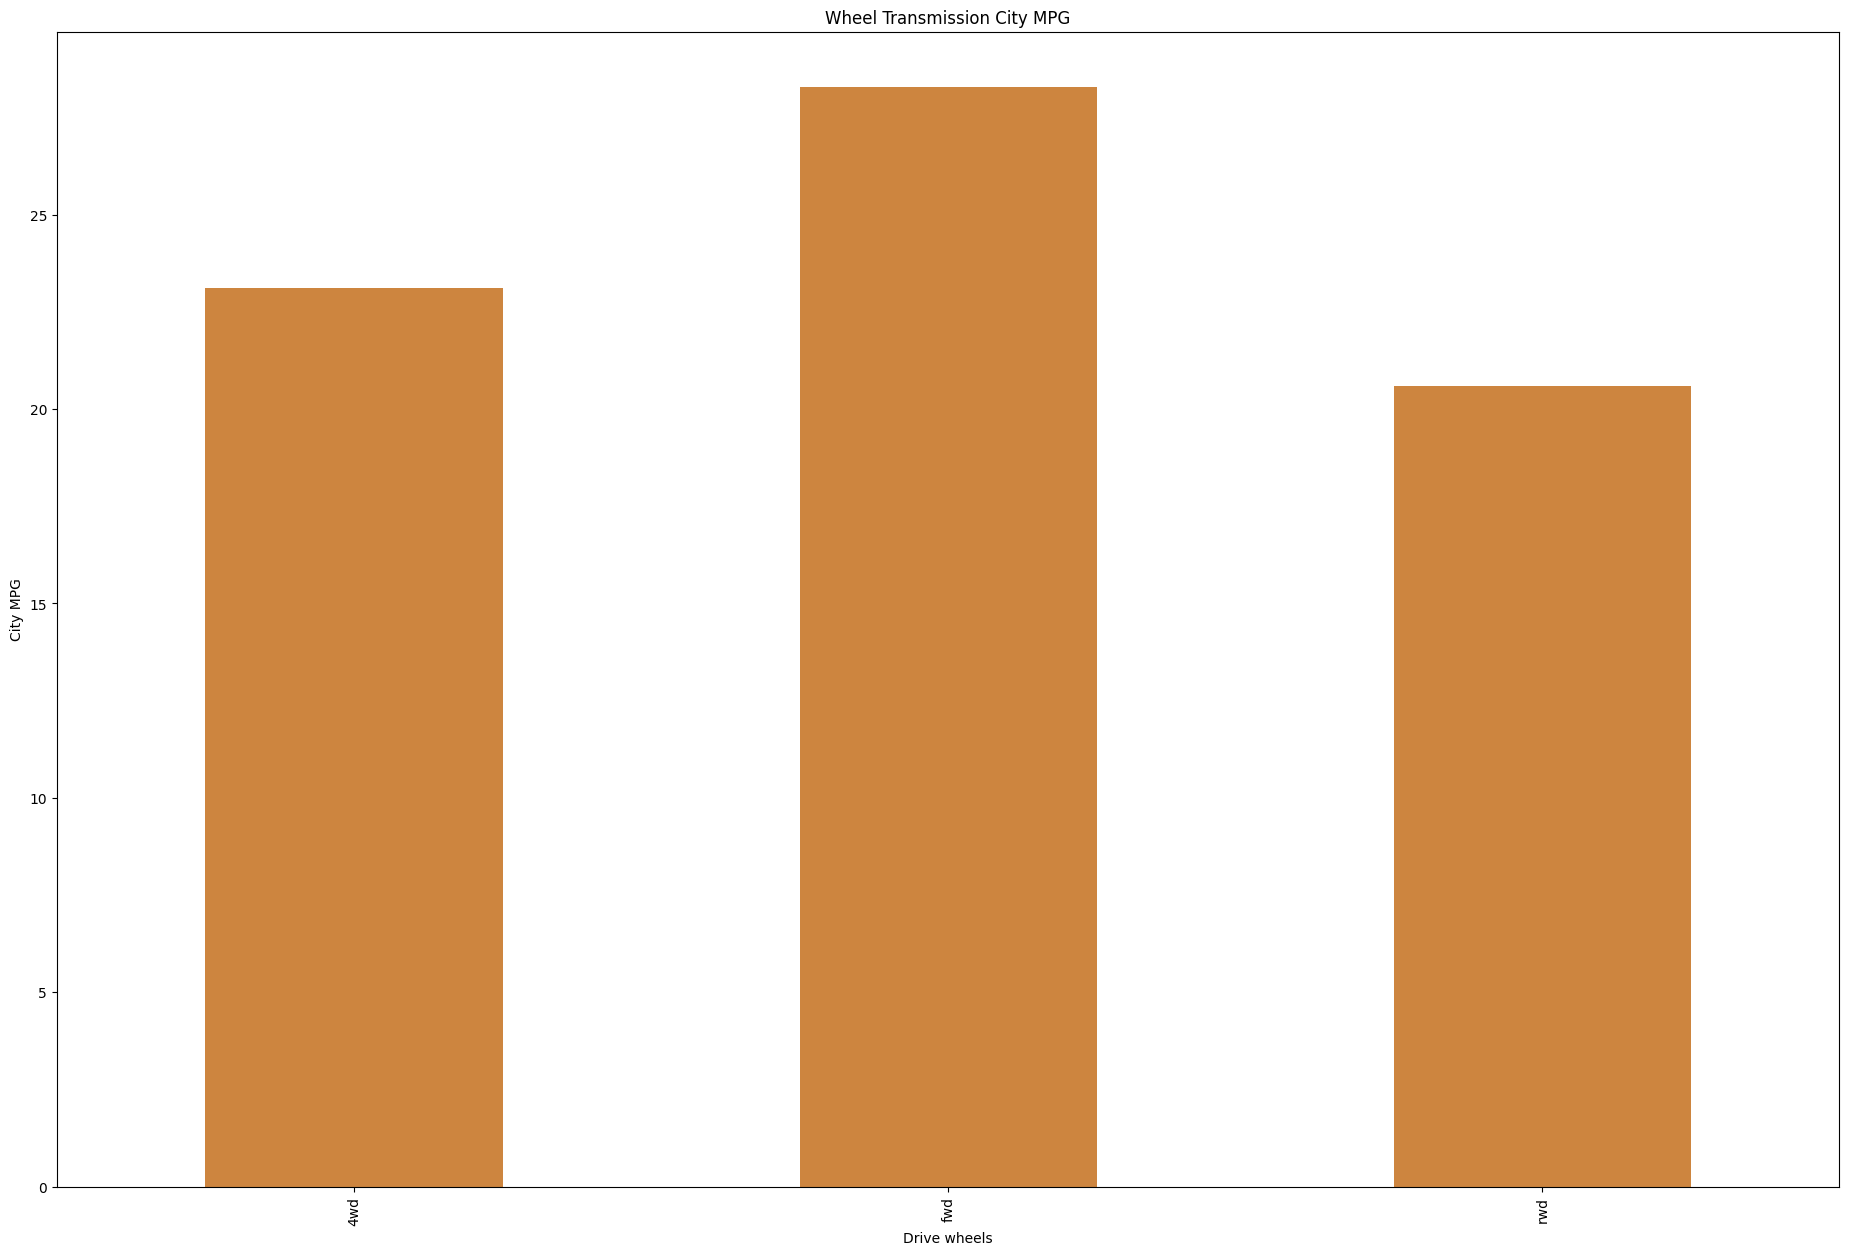

In [228]:
automobile_df.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Wheel Transmission City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

Analysis shows mileage based on city driving for front wheel drive is the most popular with 4 wheel drive and closely followed by rear wheel drive vehicles

Drive wheels and Highway MPG bar chart

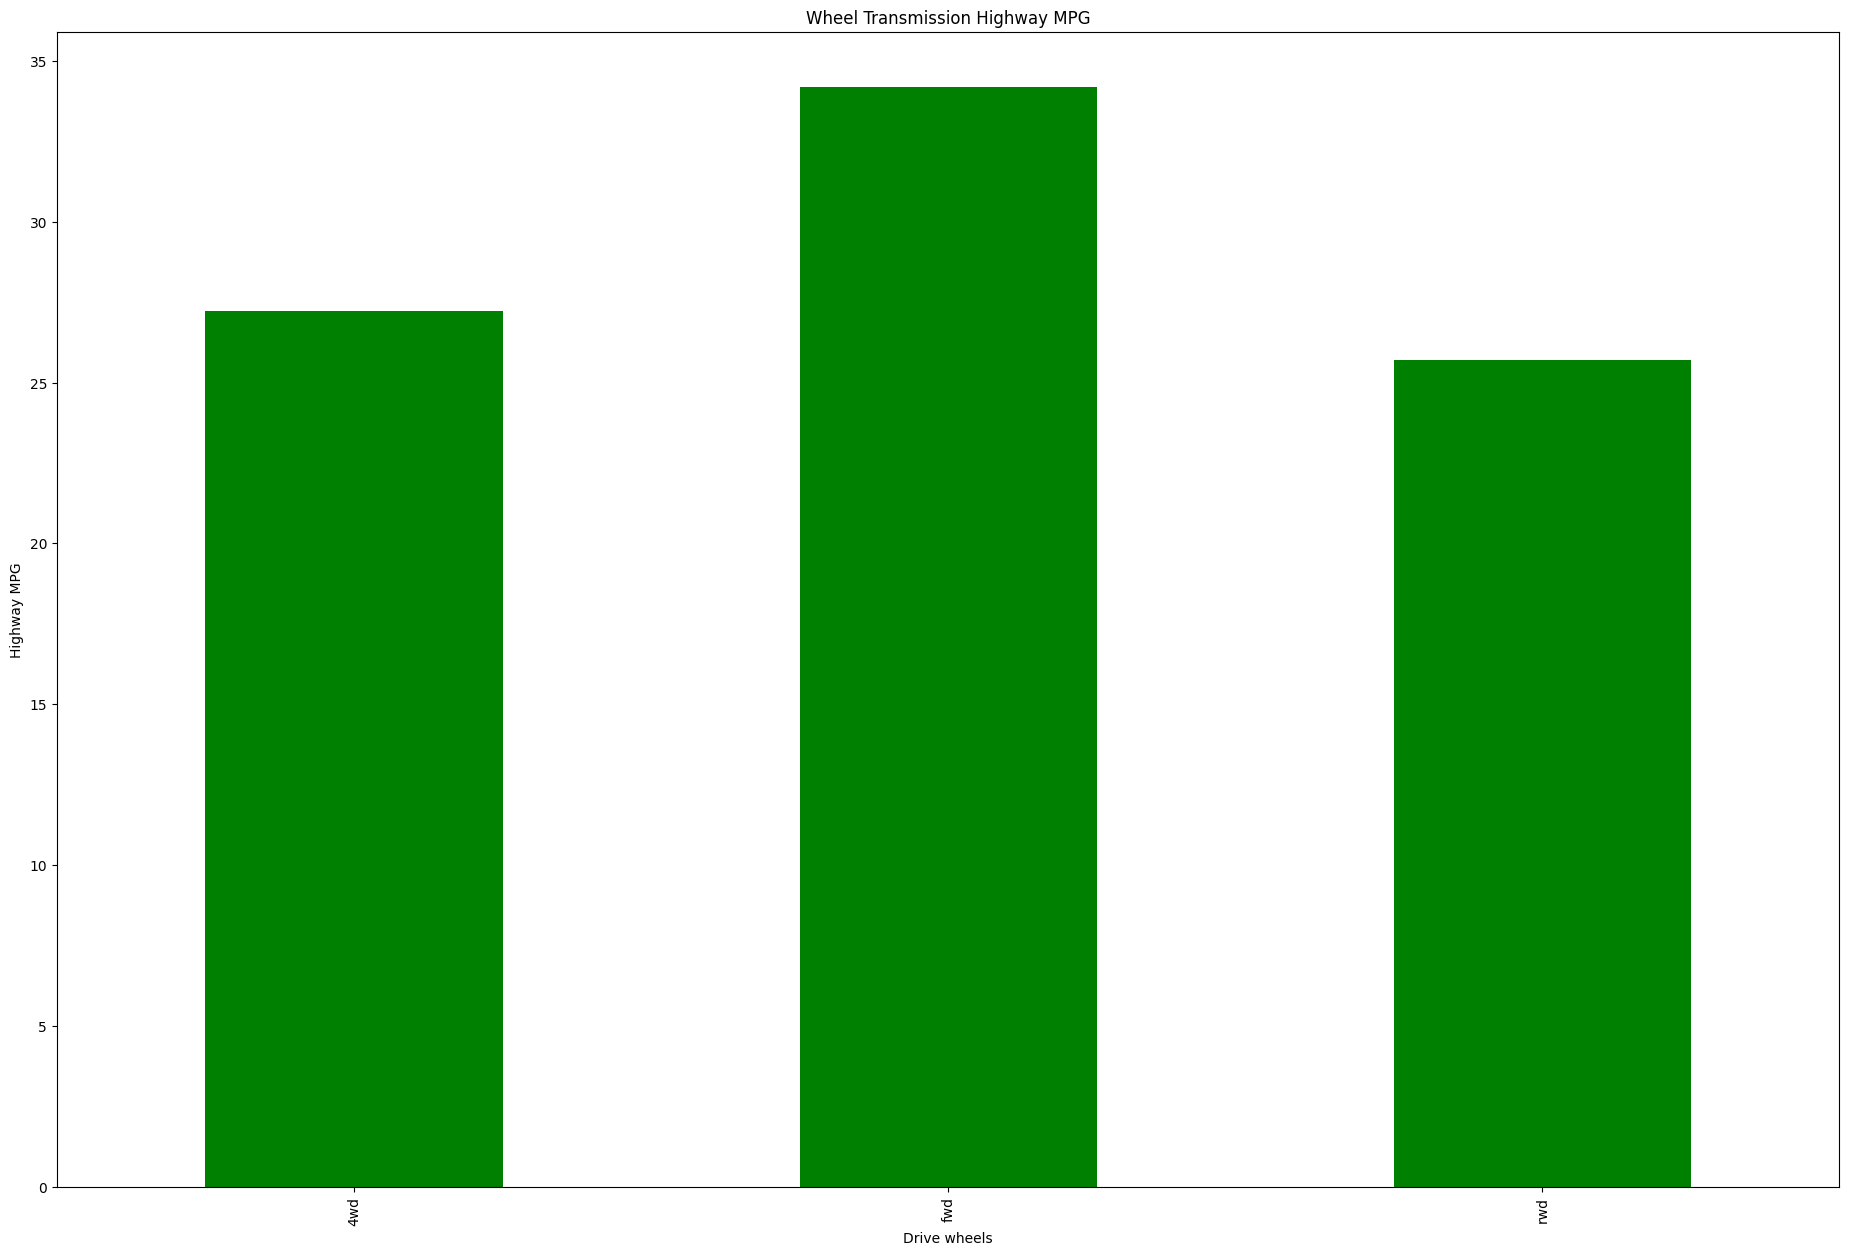

In [229]:
automobile_df.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'green');
plt.title("Wheel Transmission Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

Analysis shows mileage based on highway driving for front wheel drive is the most popular with 4 wheel drive and closely followed by rear wheel drive vehicles. This is very similar comparison to City MPG so now further analysis between these two variables are required.

Wheel Transmission and Price box plot

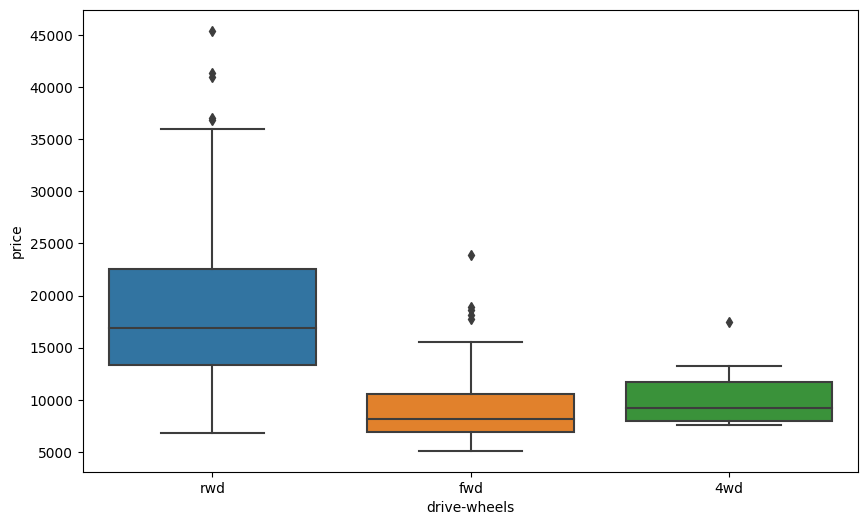

In [230]:
plt.rcParams['figure.figsize']=(10,6)
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile_df)

Analysis shows rear wheel drive cars are most expensive and front wheel is least expensive cars. Four wheel drive cars are little higher than the front wheel drive cars.

### Vehicle manufacturer by number of frequency diagram

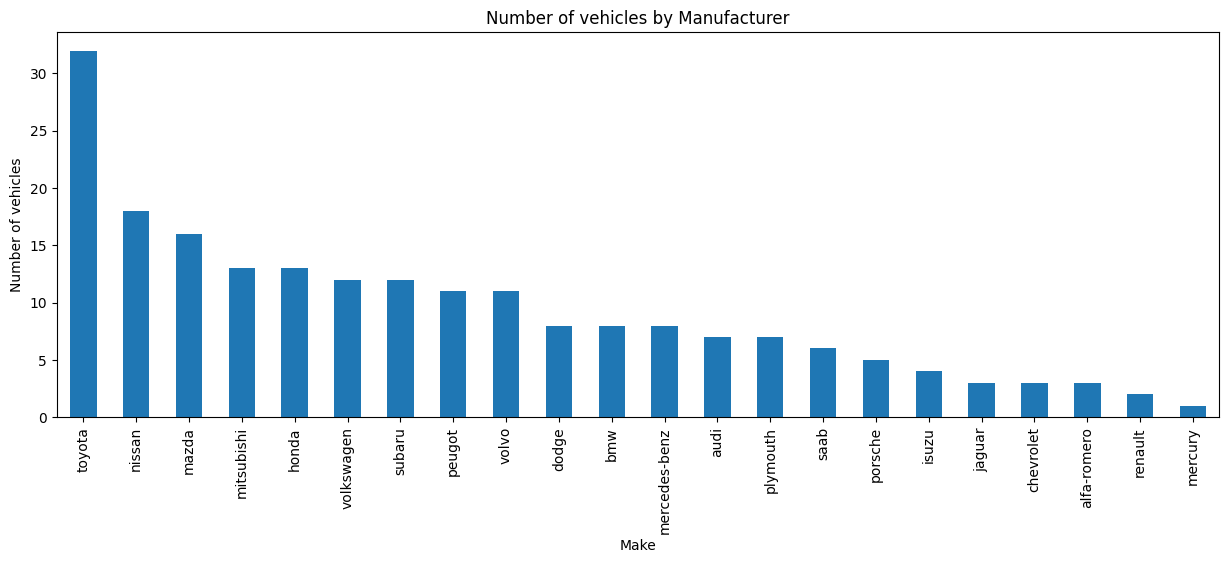

In [231]:
automobile_df.make.value_counts().nlargest(22).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by Manufacturer")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

Analysis shows Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan

Boxplot to compare manufacturer make and price

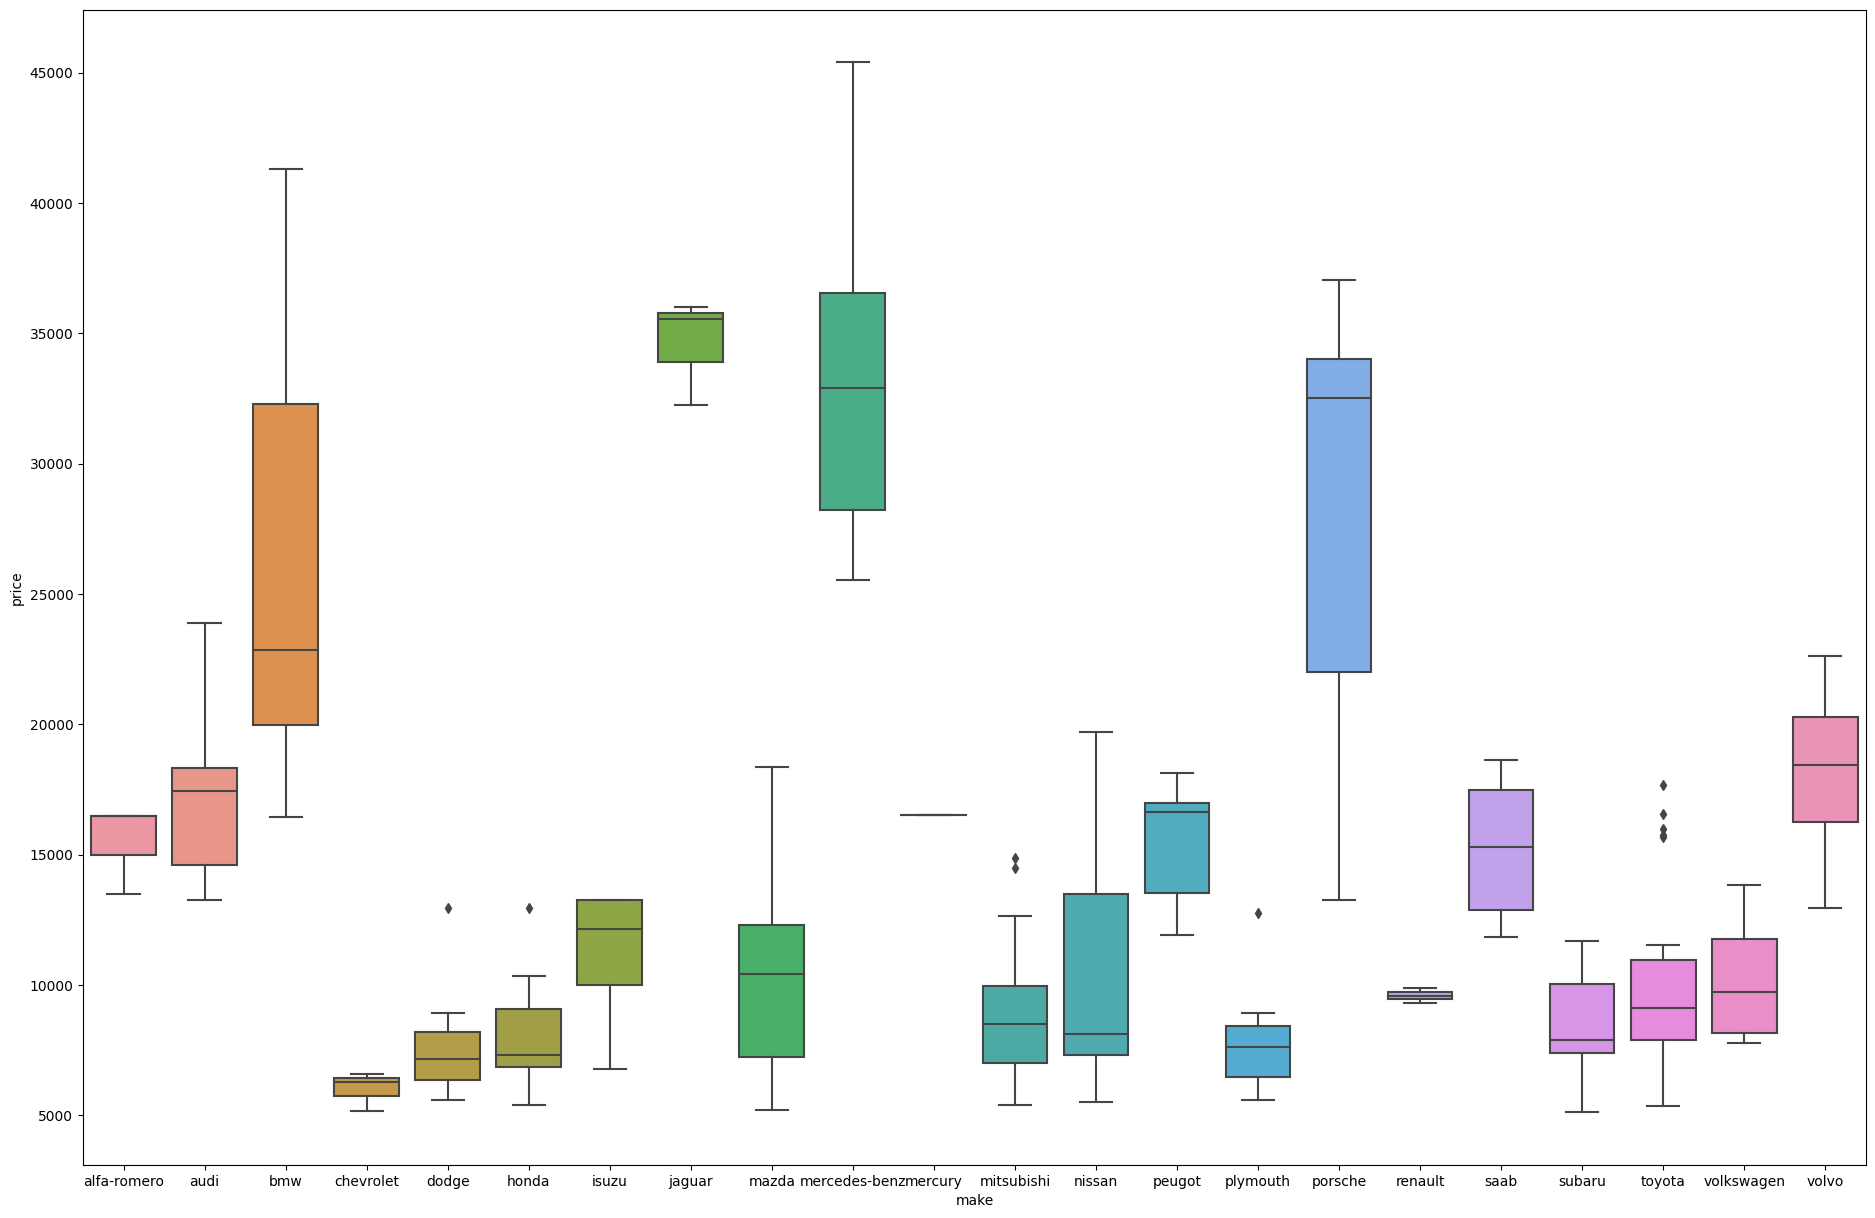

In [232]:
plt.rcParams['figure.figsize']=(23,15)
ax = sns.boxplot(x="make", y="price", data=automobile_df)

Analysis shows Mercedes Benz is the most expensive car and the least expensive is Chevrolet.
The manufacturer with have the highest list price are Porsche, Jaguar, BMW and Mercedes.
The manufacturer with the least list price are Plymouth, Honda, dodge and Chevrolet.


### Catplot of make and fuel type

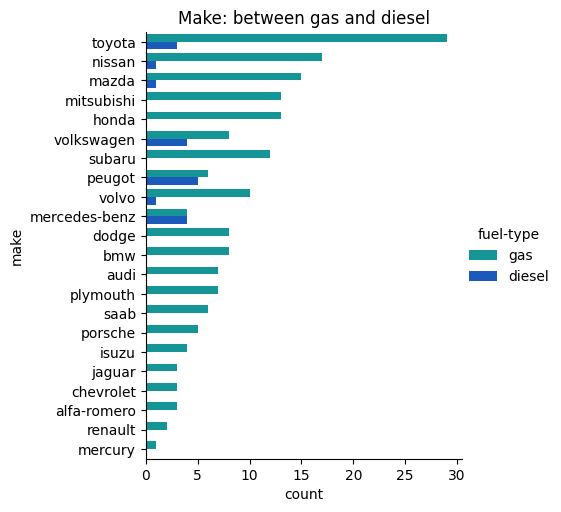

In [243]:
sortit = automobile_df['make'].value_counts().index
sns.catplot(y = 'make',data = automobile_df,kind = 'count',hue = 'fuel-type',order = sortit,palette = 'winter_r')
plt.title("Make: between gas and diesel");

The above analysis shows toyota has the highest produced gas fuel type cars and 4th highest diesel produced cars. Peugot produces the most diesel cars closely followed by volkswagon and mercedes-benz. There is no mention of hybrid or electric fuel types which would suggest this data frame is at least 10 years old from current day (early 2023).

### Catplot of make and aspiration

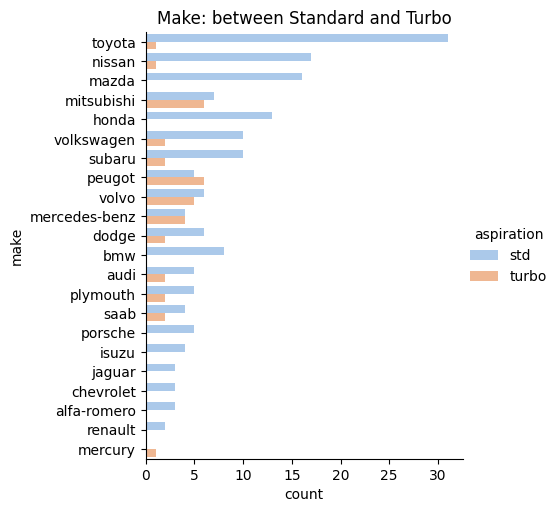

In [244]:
sns.catplot(y = 'make',data = automobile_df,kind = 'count',hue = 'aspiration',order = sortit,palette = 'pastel')
plt.title("Make: between Standard and Turbo");

This analysis shows both mitsubishi and peugot manufacturers have the highest counts for std and turbo aspirations in their vehicles

### Lets investigate the engines in these vehicles now

Number of cylinders in a pie chart

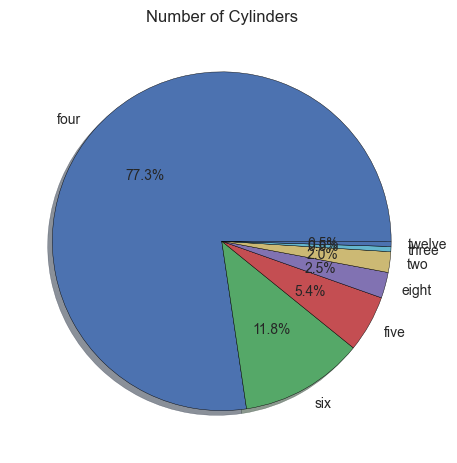

In [248]:
lab1 = automobile_df['num-of-cylinders'].value_counts().index
kindd1 = automobile_df['num-of-cylinders'].value_counts()

plt.pie(kindd1 , labels = lab1 , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
plt.title("Number of Cylinders")
plt.show()

Analysis shows cars with four cylinders sold are the most popular

Lets look at Number of cylinders and the engine now

In [254]:
automobile_df[automobile_df['num-of-cylinders']=='twelve']
nu = list(automobile_df['num-of-cylinders'].unique())
automobile_df['num-of-cylinders'].replace(nu,[4,6,5,3,12,2,8],inplace =True)

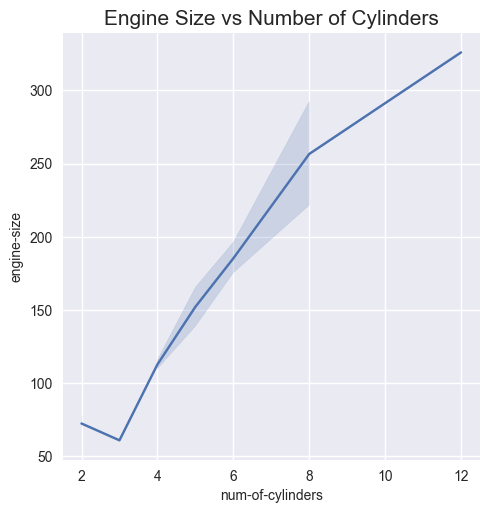

In [255]:
sns.relplot(x='num-of-cylinders',y='engine-size',data =automobile_df,kind= 'line')
plt.title("Engine Size vs Number of Cylinders",size = 15)
plt.show()

From the above analysis there is a relationship between the larger the engine size, the higher the number of cylinders